# Part 0: Data Pre-processing

In [2]:
import pandas as pd

In [8]:
# load data here
# may not use everything, reading just in case
file_path = 'OHIE/'
des_data = pd.read_csv(file_path+'OHIE_descriptive_vars.csv')
state_data = pd.read_csv(file_path+'OHIE_stateprograms_vars.csv')
s0m_data = pd.read_csv(file_path+'OHIE_survey0m_vars.csv')
s6m_data = pd.read_csv(file_path+'OHIE_survey6m_vars.csv')
s12m_data = pd.read_csv(file_path+'OHIE_survey12m_vars.csv')
ips_data = pd.read_csv(file_path+'OHIE_inperson_vars.csv')
ed_data = pd.read_csv(file_path+'OHIE_ed_vars.csv')
pat_data = pd.read_csv(file_path+'OHIE_patterns_vars.csv')

In [417]:
# potentially all useful covariates
des_vars = ['person_id', 'household_id', 'treatment', 'draw_lottery', 'applied_app', 'approved_app',
            'dt_notify_lottery', 'dt_retro_coverage', 'numhh_list', 'birthyear_list', 'have_phone_list', 'english_list', 
            'female_list', 'first_day_list', 'last_day_list', 'pobox_list', 'self_list', 'week_list', 'zip_msa_list']
des_subdata = pd.DataFrame(des_data[des_vars])
des_subdata['approved_app'].unique()
#des_subdata[:5]

array(['No', nan, 'Yes'], dtype=object)

In [419]:
des_subdata['treatment_indc'] = (des_subdata['treatment'] == 'Selected').astype(int)
des_subdata['applied_app_indc'] = (des_subdata['applied_app'] == 'Submitted an Application to OHP').astype(int)
des_subdata['approved_app_indc'] = (des_subdata['approved_app'] == 'Yes').astype(int)
des_subdata['OHIE_app_ins'] = des_subdata['treatment_indc'] * des_subdata['applied_app_indc'] * des_subdata['approved_app_indc']
des_subdata[:3]
# this is my very dumb approach to keep track of who got insurance through the lottery
# may not be useful, but it is here

,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,dt_notify_lottery,dt_retro_coverage,numhh_list,birthyear_list,...,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,treatment_indc,applied_app_indc,approved_app_indc,OHIE_app_ins
0,1.0,100001.0,Selected,Lottery Draw 7,Submitted an Application to OHP,No,2008-08-12,2008-09-08,signed self up,1978,...,Did NOT sign up for lottery list on first day,Did NOT sign up for lottery list on last day,1: POBOX,Signed self up,Week 2,Zip code of residence in a MSA,1,1,0,0
1,2.0,100002.0,Selected,Lottery Draw 6,Did NOT submit an application to OHP,No,2008-07-14,2008-08-08,signed self up,1984,...,Did NOT sign up for lottery list on first day,Did NOT sign up for lottery list on last day,0: Not POBOX,Signed self up,Week 3,Zip code of residence in a MSA,1,0,0,0
2,3.0,100003.0,Not selected,Lottery Draw 2,NaN,NaN,2008-04-07,2008-04-08,signed self up,1971,...,Did NOT sign up for lottery list on first day,Did NOT sign up for lottery list on last day,0: Not POBOX,Signed self up,Week 3,Zip code of residence in a MSA,0,0,0,0


In [134]:
state_vars1 = ['person_id', 'ohp_all_ever_matchn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_matchn_30sep2009', 
              'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07',
              'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009',
               'tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009']
state_subdata1 = pd.DataFrame(state_data[state_vars1])

In [135]:
state_vars2 = ['person_id', 'ohp_all_ever_firstn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_firstn_30sep2009',
              'snap_ever_presurvey12m', 'snap_ever_firstn_survey12m', 'snap_tot_hh_presurvey12m',
              'snap_tot_hh_firstn_survey12m', 'tanf_ever_presurvey12m', 'tanf_ever_firstn_survey12m',
               'tanf_tot_hh_presurvey12m', 'tanf_tot_hh_firstn_survey12m']
state_subdata2 = pd.DataFrame(state_data[state_vars2])

In [461]:
# these two do have differences (albeit not sure significant)
#state_subdata['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    56909
#Enrolled        18013
#state_subdata['ohp_all_ever_firstn_30sep2009'].value_counts() # codebook is wrong
#NOT enrolled    56563
#Enrolled        18359

# there's smth interesting going on here, but not quite sure what
# for difference firstn and matchn, see codebook
# I was going to use matchn, but then Finkelstein (2012) used firstn and I cannot find their rationale for doing so...
# so maybe do matchn (which I find it easier to justify logically), and then we can do it against firstn for robustness check??

In [460]:
#state_subdata['snap_tot_hh_prenotify07'].value_counts()

In [136]:
state_subdata1['ohp_match_indc'] = (state_subdata1['ohp_all_ever_matchn_30sep2009'] == 'Enrolled').astype(int)
state_subdata1['snap_pre_indc'] = (state_subdata1['snap_ever_prenotify07'] == 'Yes').astype(int)
state_subdata1['snap_post_indc'] = (state_subdata1['snap_ever_matchn_30sep2009'] == 'Yes').astype(int)
state_subdata1['tanf_pre_indc'] = (state_subdata1['tanf_ever_prenotify07'] == 'Yes').astype(int)
state_subdata1['tanf_post_indc'] = (state_subdata1['tanf_ever_matchn_30sep2009'] == 'Yes').astype(int)
# Medicaid, SNAP and TANF are all separate programs

In [90]:
s12m_data['returned_12m'].value_counts()

returned_12m
No     34628
Yes    23777
Name: count, dtype: int64

In [656]:
s12m_vars = ['person_id', 'sample_12m', 'returned_12m', 'sample_12m_resp', 'weight_intensive_12m', 'weight_newlottery_12m', 
             'weight_12m', 'wave_survey12m', 'protocol_12m',
             'ins_any_12m','ins_ohp_12m', 'rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m','er_num_mod_12m', 'hosp_any_12m', 'hosp_num_mod_12m', 'cost_any_oop_12m', 'cost_tot_oop_12m', 
             'cost_any_owe_12m', 'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m', 'happiness_12m', 
             'health_gen_bin_12m', 'health_chg_bin_12m', 'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m', 
             'dia_dx_12m', 'ast_dx_12m', 'hbp_dx_12m', 'emp_dx_12m', 'ami_dx_12m', 'chf_dx_12m', 'dep_dx_12m', 
             'chl_dx_12m', 'kid_dx_12m',
             'female_12m', 'birthyear_12m', 'employ_12m','hhinc_pctfpl_12m', 'race_hisp_12m', 'race_white_12m', 
             'race_black_12m', 'race_amerindian_12m', 'race_asian_12m','race_pacific_12m', 'race_other_qn_12m', 
             'edu_12m', 'hhsize_12m']
s12m_subdata = pd.DataFrame(s12m_data[s12m_vars])

In [657]:
s12m_subdata['insample_indc'] = (s12m_subdata['sample_12m'] == 'In 12m mail survey sample').astype(int)
s12m_subdata['resp_indc'] = (s12m_subdata['returned_12m'] == 'Yes').astype(int)
s12m_subdata['nonresp_indc'] = (s12m_subdata['returned_12m'] == 'No').astype(int)

risk_vars = ['dia_dx_12m', 'ast_dx_12m', 'hbp_dx_12m', 'emp_dx_12m', 'ami_dx_12m', 'chf_dx_12m', 'dep_dx_12m', 
             'chl_dx_12m', 'kid_dx_12m']
s12m_subdata['highrisk_indc'] = s12m_subdata[risk_vars].apply(lambda row: 1 if 'Diagnosed' in row.values else 0, axis=1)
# also suffering from non-responder bias ... 

s12m_subdata.head()

,person_id,sample_12m,returned_12m,sample_12m_resp,weight_intensive_12m,weight_newlottery_12m,weight_12m,wave_survey12m,protocol_12m,ins_any_12m,...,race_amerindian_12m,race_asian_12m,race_pacific_12m,race_other_qn_12m,edu_12m,hhsize_12m,insample_indc,resp_indc,nonresp_indc,highrisk_indc
0,1.0,In 12m mail survey sample,Yes,12m mail survey responder,1.0,1.000000,1.0,Survey Draw 6,Basic,No,...,No,No,No,No,hs diploma or GED,3.0,1,1,0,1
1,2.0,In 12m mail survey sample,Yes,12m mail survey responder,1.0,1.000000,1.0,Survey Draw 6,Basic,No,...,No,No,No,No,hs diploma or GED,2.0,1,1,0,0
2,3.0,In 12m mail survey sample,No,NOT a 12m mail survey responder,0.0,1.046526,0.0,Survey Draw 4,Basic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0
3,4.0,NOT in 12m mail survey sample,NaN,NOT a 12m mail survey responder,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,5.0,In 12m mail survey sample,Yes,12m mail survey responder,1.0,1.000000,1.0,Survey Draws 7 & 8,Basic,Yes,...,No,No,No,Yes,hs diploma or GED,3.0,1,1,0,1


In [658]:
data12m = pd.merge(des_subdata, state_subdata1, on='person_id', how='left')

In [659]:
data12m = pd.merge(data12m, s12m_subdata, on='person_id', how='left')

In [120]:
#data12m['numhh_list']

In [660]:
data12m['numhh_list_copy'] = data12m['numhh_list']
data12m = pd.get_dummies(data12m, columns=['numhh_list_copy'], drop_first=False)

In [244]:
#data12m.columns

In [101]:
import statsmodels.api as sm

In [661]:
sdata12m = data12m[data12m['insample_indc'] == 1]
sdata12m = pd.DataFrame(sdata12m)
# sdata12m.info()

# Part 1: Base DML for LATE (Not Accounting for NA's)

## Motivation

From Finkelstein et al. (2012):

"In all of our analyses, $X_{ih}$ includes indicator variables for the number of individuals in the household listed on the lottery sign-up form (hereafter “household size”); as already noted, although the state randomly sampled from individuals on the list, the entire household of any selected individual was considered selected and eligible to apply for insurance. As a result, selected (treatment) individuals are disproportionately drawn from larger households. For outcomes in the survey data, $X_{ih}$ also includes indicator variables for survey wave (and the interaction of these indicator variables with household size indicators) because the fraction of treatment individuals varies across the seven survey waves.'' (Empirical Framework)

We have 3 different household size and 7 different survey waves. Thus, disregarding multicollinearity *and* assuming randomization worked as intended, we already have 3+7+21 = 31 covariates. This, I think, is a good place to apply the approach in Section 1.5.3.

In [557]:
# D = ohp_match_indc
# Z = treatment_indc
# now make sure X (controls) and Y (outcome) are okay

In [663]:
sdata12m['wave_survey12m_copy'] = sdata12m['wave_survey12m']
sdata12m = pd.get_dummies(sdata12m, columns=['wave_survey12m_copy'], drop_first=False)

In [664]:
# start with X
# gonna change the names, they are way too long
sdata12m['numhh1'] = sdata12m['numhh_list_copy_signed self up'].astype(int)
sdata12m['numhh2'] = sdata12m['numhh_list_copy_signed self up + 1 additional person'].astype(int)
sdata12m['numhh3'] = sdata12m['numhh_list_copy_signed self up + 2 additional people'].astype(int)

sdata12m['wave1'] = sdata12m['wave_survey12m_copy_Survey Draw 1'].astype(int)
sdata12m['wave2'] = sdata12m['wave_survey12m_copy_Survey Draw 2'].astype(int)
sdata12m['wave3'] = sdata12m['wave_survey12m_copy_Survey Draw 3'].astype(int)
sdata12m['wave4'] = sdata12m['wave_survey12m_copy_Survey Draw 4'].astype(int)
sdata12m['wave5'] = sdata12m['wave_survey12m_copy_Survey Draw 5'].astype(int)
sdata12m['wave6'] = sdata12m['wave_survey12m_copy_Survey Draw 6'].astype(int)
sdata12m['wave78'] = sdata12m['wave_survey12m_copy_Survey Draws 7 & 8'].astype(int)

In [665]:
numhh_indc_list = ['numhh1', 'numhh2', 'numhh3']
wave_indc_list = ['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave78']

# Generate interaction terms
interaction_terms = []
for x_var in numhh_indc_list:
    for y_var in wave_indc_list:
        interaction_name = f'{x_var}_{y_var}_interaction'
        sdata12m[interaction_name] = sdata12m[x_var] * sdata12m[y_var]
        interaction_terms.append(interaction_name)

In [666]:
controls = numhh_indc_list + wave_indc_list + interaction_terms
#controls

In [667]:
# now Y (outcomes)
# 1st group: Health Care Utilization
sdata12m['rx_any_indc'] = np.where(sdata12m['rx_any_12m'] == 'Yes', 1, np.where(sdata12m['rx_any_12m'] == 'No', 0, np.nan))
sdata12m['rx_any_miss'] = sdata12m['rx_any_12m'].isna().astype(int)
sdata12m['rx_num_mod_miss'] = sdata12m['rx_num_mod_12m'].isna().astype(int)

In [602]:
#pip install doubleml

In [603]:
import numpy as np
import doubleml as dml
from doubleml.datasets import make_iivm_data
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

There is already one problem: this is no way to account for survey weights if we directly use packages - I think that needs to be hand-coded. I am going to ahead and use packages and worry about weights later. If we do not have time, we can address it as a 'potential concern' in the paper.

In [626]:
#rx_any_data.shape

(18332, 34)

In [625]:
rx_any_vars = controls + ['ohp_match_indc', 'treatment_indc', 'rx_any_indc']
rx_any_data = sdata12m.loc[sdata12m['rx_any_miss'] != 1]
rx_any_data = rx_any_data[rx_any_vars]
rx_any_data.head()

,numhh1,numhh2,numhh3,wave1,wave2,wave3,wave4,wave5,wave6,wave78,...,numhh3_wave1_interaction,numhh3_wave2_interaction,numhh3_wave3_interaction,numhh3_wave4_interaction,numhh3_wave5_interaction,numhh3_wave6_interaction,numhh3_wave78_interaction,ohp_match_indc,treatment_indc,rx_any_indc
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
12,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1.0


In [627]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

obj_dml_data = dml.DoubleMLData(rx_any_data, 'rx_any_indc', 'ohp_match_indc', z_cols='treatment_indc')

dml_iivm_obj = dml.DoubleMLIIVM(obj_dml_data, ml_g, ml_m, ml_r)

print(dml_iivm_obj.fit())
# in comparison to coef = 0.088, SE = 0.029, p-val = 0.002

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: rx_any_indc
Treatment variable(s): ['ohp_match_indc']
Covariates: ['numhh1', 'numhh2', 'numhh3', 'wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave78', 'numhh1_wave1_interaction', 'numhh1_wave2_interaction', 'numhh1_wave3_interaction', 'numhh1_wave4_interaction', 'numhh1_wave5_interaction', 'numhh1_wave6_interaction', 'numhh1_wave78_interaction', 'numhh2_wave1_interaction', 'numhh2_wave2_interaction', 'numhh2_wave3_interaction', 'numhh2_wave4_interaction', 'numhh2_wave5_interaction', 'numhh2_wave6_interaction', 'numhh2_wave78_interaction', 'numhh3_wave1_interaction', 'numhh3_wave2_interaction', 'numhh3_wave3_interaction', 'numhh3_wave4_interaction', 'numhh3_wave5_interaction', 'numhh3_wave6_interaction', 'numhh3_wave78_interaction']
Instrument variable(s): ['treatment_indc']
No. Observations: 18332

------------------ Score & algorithm ----------

In [629]:
rx_num_mod_vars = controls + ['ohp_match_indc', 'treatment_indc', 'rx_num_mod_12m']
rx_num_mod_data = sdata12m.loc[sdata12m['rx_num_mod_miss'] != 1]
rx_num_mod_data = rx_num_mod_data[rx_num_mod_vars]
rx_num_mod_data.head()

,numhh1,numhh2,numhh3,wave1,wave2,wave3,wave4,wave5,wave6,wave78,...,numhh3_wave1_interaction,numhh3_wave2_interaction,numhh3_wave3_interaction,numhh3_wave4_interaction,numhh3_wave5_interaction,numhh3_wave6_interaction,numhh3_wave78_interaction,ohp_match_indc,treatment_indc,rx_num_mod_12m
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.0
12,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,5.0


In [630]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

obj_dml_data = dml.DoubleMLData(rx_num_mod_data, 'rx_num_mod_12m', 'ohp_match_indc', z_cols='treatment_indc')

dml_iivm_obj = dml.DoubleMLIIVM(obj_dml_data, ml_g, ml_m, ml_r)

print(dml_iivm_obj.fit())
# in comparison to coef = 0.347, SE = 0.176, p-val = 0.049

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: rx_num_mod_12m
Treatment variable(s): ['ohp_match_indc']
Covariates: ['numhh1', 'numhh2', 'numhh3', 'wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave78', 'numhh1_wave1_interaction', 'numhh1_wave2_interaction', 'numhh1_wave3_interaction', 'numhh1_wave4_interaction', 'numhh1_wave5_interaction', 'numhh1_wave6_interaction', 'numhh1_wave78_interaction', 'numhh2_wave1_interaction', 'numhh2_wave2_interaction', 'numhh2_wave3_interaction', 'numhh2_wave4_interaction', 'numhh2_wave5_interaction', 'numhh2_wave6_interaction', 'numhh2_wave78_interaction', 'numhh3_wave1_interaction', 'numhh3_wave2_interaction', 'numhh3_wave3_interaction', 'numhh3_wave4_interaction', 'numhh3_wave5_interaction', 'numhh3_wave6_interaction', 'numhh3_wave78_interaction']
Instrument variable(s): ['treatment_indc']
No. Observations: 18321

------------------ Score & algorithm -------

In [632]:
sdata12m['doc_any_indc'] = np.where(sdata12m['doc_any_12m'] == 'Yes', 1, np.where(sdata12m['doc_any_12m'] == 'No', 0, np.nan))
sdata12m['doc_any_miss'] = sdata12m['doc_any_12m'].isna().astype(int)
sdata12m['doc_num_mod_miss'] = sdata12m['doc_num_mod_12m'].isna().astype(int)

In [ ]:
doc_any_vars = controls + ['ohp_match_indc', 'treatment_indc', 'doc_any_indc']
doc_any_data = sdata12m.loc[sdata12m['doc_any_miss'] != 1]
doc_any_data = doc_any_data[doc_any_vars]
doc_any_data.head()

In [634]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

obj_dml_data = dml.DoubleMLData(doc_any_data, 'doc_any_indc', 'ohp_match_indc', z_cols='treatment_indc')

dml_iivm_obj = dml.DoubleMLIIVM(obj_dml_data, ml_g, ml_m, ml_r)

print(dml_iivm_obj.fit())
# in comparison to coef = 0.212, SE = 0.025, p-val = <0.0001

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: doc_any_indc
Treatment variable(s): ['ohp_match_indc']
Covariates: ['numhh1', 'numhh2', 'numhh3', 'wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave78', 'numhh1_wave1_interaction', 'numhh1_wave2_interaction', 'numhh1_wave3_interaction', 'numhh1_wave4_interaction', 'numhh1_wave5_interaction', 'numhh1_wave6_interaction', 'numhh1_wave78_interaction', 'numhh2_wave1_interaction', 'numhh2_wave2_interaction', 'numhh2_wave3_interaction', 'numhh2_wave4_interaction', 'numhh2_wave5_interaction', 'numhh2_wave6_interaction', 'numhh2_wave78_interaction', 'numhh3_wave1_interaction', 'numhh3_wave2_interaction', 'numhh3_wave3_interaction', 'numhh3_wave4_interaction', 'numhh3_wave5_interaction', 'numhh3_wave6_interaction', 'numhh3_wave78_interaction']
Instrument variable(s): ['treatment_indc']
No. Observations: 23528

------------------ Score & algorithm ---------

That's it. I stopped my investigation here because the coefficients are looking too similar. After asking the prof, I realized that this is obvious: since the covariates are all fixed effects and interactions of fixed effects, the model is already saturated and non-parametric. So using DML in the base case does not give us much unless we have reason to include a continuous covariate. 

Another small point that the prof pointed out is that N.O. score should help with SE, and they are indeed smaller in our case, though not much. That is a small point we can bring up if we want to.

In [3]:
# need to read again because my computer crashed
#file_path = 'OHIE/'
#sdata12m = pd.read_csv(file_path+'s12m_data.csv')

# Part 2: DML for LATE with Missing Values

## Motivation

Quotes from Finkelstein et al. (2012):

"The survey data allow examination of a much richer set of outcomes than is feasible with administrative data alone, but with a 50% effective response rate, are subject to potential nonresponse bias. Our available evidence on this issue is limited but reasonably reassuring." (Introduction)

"These outcomes are only available for individuals who responded to the mail survey and may therefore not be representative of the full sample." (Data)

"We use the fairly conservative procedure of Lee (2009) to bound the potential bias arising from differential response rates between treatments and controls." (Remark 19)

**What if we can directly address this non-response bias through machine learning?**

**Approach 1**: Use approach proposed in Lecture 14-15 1.5.1 Missing Values and Homework 4. This notebook will be focused on investigating that.

**Approach 2**: Use imputation. I asked TA and he seconded Tim's suggestion that imputation with KNN is a very good approach. We can certainly do this and cross check the two approaches.

## Justification

It is easy to see intuitively that many factors can influence both health and financial outcomes and response rate - age, gender, socioeconomic status, etc. - not to mention that the basic versus intensive protocols also introduced some variation.

First, we want to show that this non-response bias is correlated with some observation characteristics. We begin the exploration with correlation heatmaps. Note that correlation plots are not entirely valid because they only show marginal relations (instead of joint), but it is a good starting point to gauge which variables are potentially important.

*Update 02/29: prof and TA think it's good to include graphs for certain covariates to show imbalance.*

In [668]:
sdata12m['protocol_12m_copy'] = sdata12m['protocol_12m']
sdata12m = pd.get_dummies(sdata12m, columns=['protocol_12m_copy'], drop_first=False)

In [693]:
sdata12m['intproto_indc'] = (sdata12m['protocol_12m_copy_Intensive'] == True).astype(int)

In [669]:
sdata12m_corr1 = sdata12m[['nonresp_indc', 
       'numhh_list_copy_signed self up',
       'numhh_list_copy_signed self up + 1 additional person',
       'numhh_list_copy_signed self up + 2 additional people',
       'wave_survey12m_copy_Survey Draw 1',
       'wave_survey12m_copy_Survey Draw 2',
       'wave_survey12m_copy_Survey Draw 3',
       'wave_survey12m_copy_Survey Draw 4',
       'wave_survey12m_copy_Survey Draw 5',
       'wave_survey12m_copy_Survey Draw 6',
       'wave_survey12m_copy_Survey Draws 7 & 8', 
       'protocol_12m_copy_Intensive']]

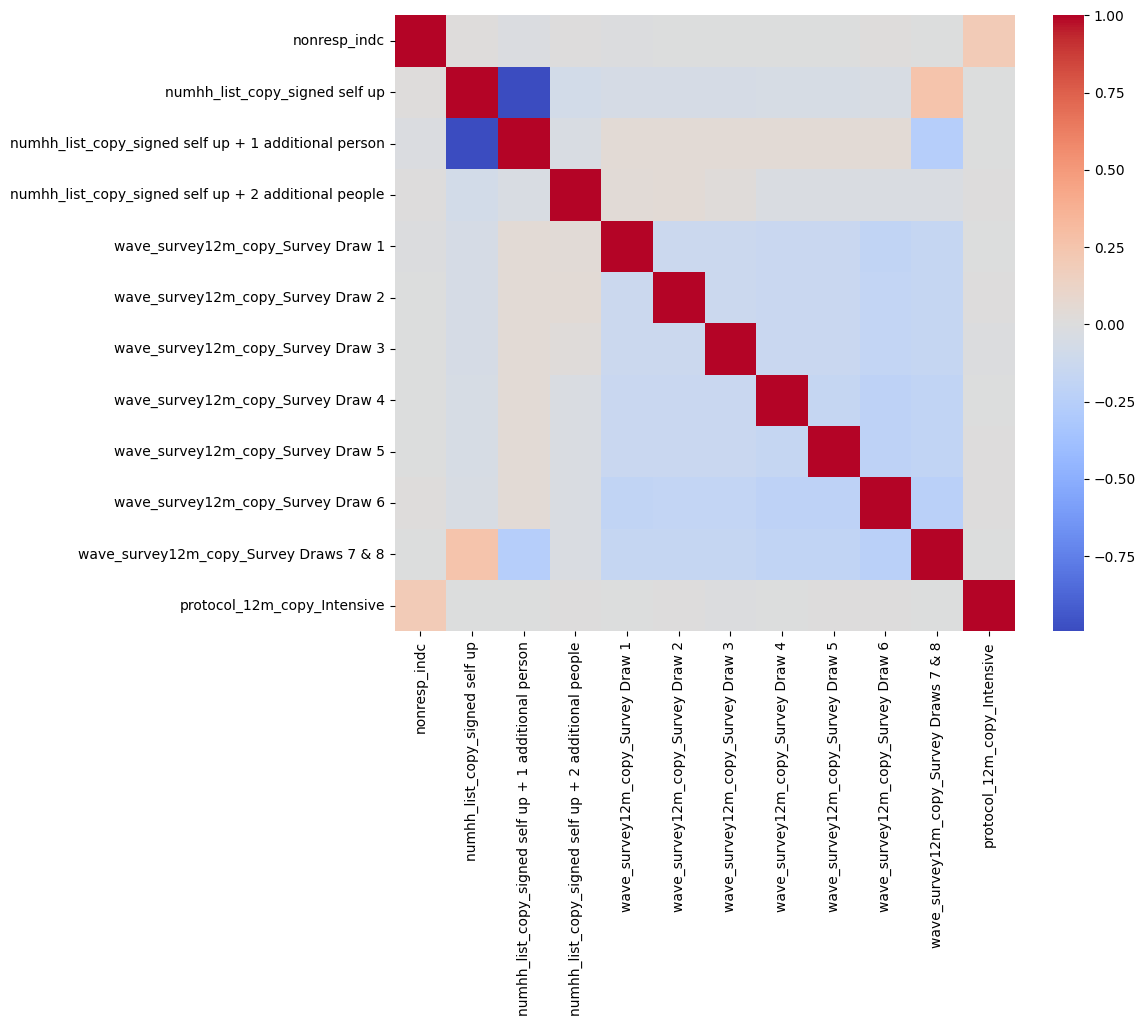

In [413]:
corr1_mat = sdata12m_corr1.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr1_mat, cmap='coolwarm')
plt.show()
# note protocol_12m_copy_intensive

In [670]:
#sdata12m['treatment_copy'] = sdata12m['treatment']
#sdata12m = pd.get_dummies(sdata12m, columns=['treatment_copy'], drop_first=False)
sdata12m['lot_indc'] = (sdata12m['treatment'] == 'Selected').astype(int)

In [671]:
sdata12m['age'] = 2009 - sdata12m['birthyear_list']

In [672]:
sdata12m['phone_indc'] = (sdata12m['have_phone_list'] == 'Gave Phone Number').astype(int)
sdata12m['english_indc'] = (sdata12m['english_list'] == 'Requested English materials').astype(int)
sdata12m['female_indc'] = (sdata12m['female_list'] == '1: Female').astype(int)
sdata12m['first_day_indc'] = (sdata12m['first_day_list'] == 'Signed up for lottery list on first day').astype(int)
sdata12m['last_day_indc'] = (sdata12m['last_day_list'] == 'Signed up for lottery list on last day').astype(int)
sdata12m['pobox_indc'] = (sdata12m['pobox_list'] == '1: POBOX').astype(int)
sdata12m['self_indc'] = (sdata12m['self_list'] == 'Signed self up').astype(int)

In [673]:
sdata12m['week_list_copy'] = sdata12m['week_list']
sdata12m = pd.get_dummies(sdata12m, columns=['week_list_copy'], drop_first=False)

In [674]:
sdata12m['zip_msa_indc'] = (sdata12m['zip_msa_list'] == 'Zip code of residence in a MSA').astype(int)

In [436]:
#sdata12m['self_indc'].value_counts()

In [437]:
#sdata12m['self_list'].value_counts()

In [449]:
sdata12m.columns[-20:]

Index(['wave_survey12m_copy_Survey Draw 6',
       'wave_survey12m_copy_Survey Draws 7 & 8', 'protocol_12m_copy_Basic',
       'protocol_12m_copy_Intensive', 'lot_indc', 'age', 'phone_indc',
       'english_indc', 'female_indc', 'first_day_indc', 'last_day_indc',
       'pobox_indc', 'self_indc', 'week_list_copy_Week 1',
       'week_list_copy_Week 2', 'week_list_copy_Week 3',
       'week_list_copy_Week 4', 'week_list_copy_Week 5',
       'week_list_copy_Week 6', 'zip_msa_indc'],
      dtype='object')

In [450]:
sdata12m_corr2 = sdata12m[['nonresp_indc', 'age', 'phone_indc',
       'english_indc', 'female_indc', 'first_day_indc', 'last_day_indc',
       'pobox_indc', 'self_indc', 'week_list_copy_Week 1',
       'week_list_copy_Week 2', 'week_list_copy_Week 3',
       'week_list_copy_Week 4', 'week_list_copy_Week 5',
       'week_list_copy_Week 6', 'zip_msa_indc']]

In [451]:
sdata12m_corr2.corr().iloc[0, :]

nonresp_indc             1.000000
age                     -0.163250
phone_indc              -0.075261
english_indc            -0.025452
female_indc             -0.075004
first_day_indc          -0.030312
last_day_indc            0.027722
pobox_indc              -0.024149
self_indc               -0.007169
week_list_copy_Week 1   -0.036164
week_list_copy_Week 2   -0.001275
week_list_copy_Week 3   -0.005533
week_list_copy_Week 4    0.004534
week_list_copy_Week 5    0.040965
week_list_copy_Week 6    0.018430
zip_msa_indc             0.035107
Name: nonresp_indc, dtype: float64

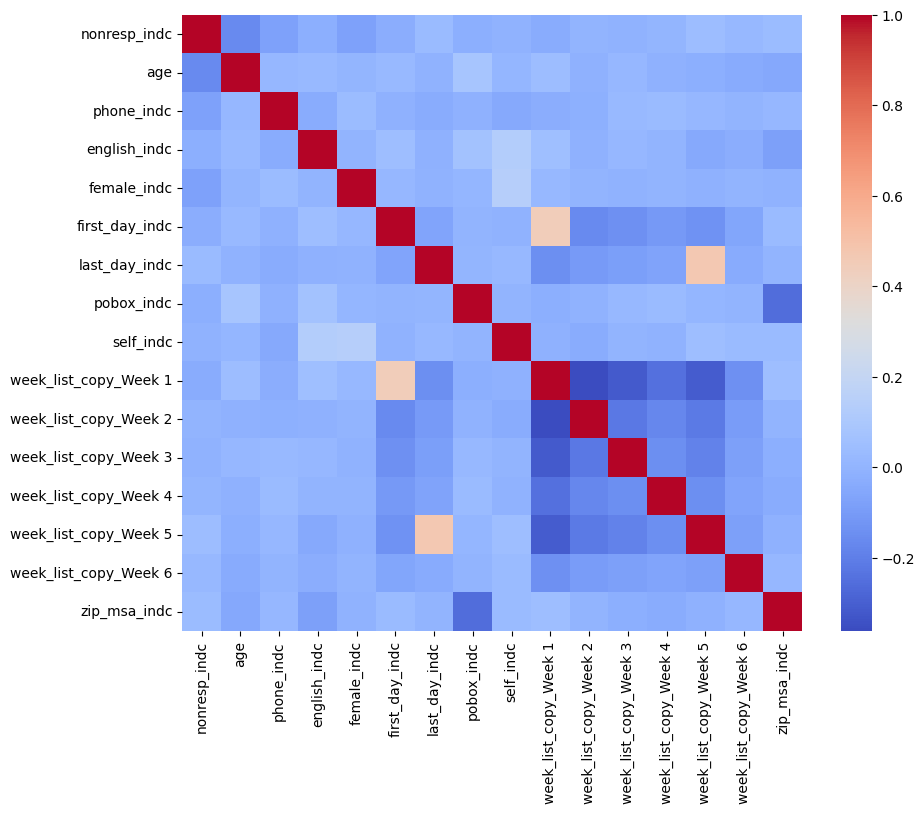

In [452]:
corr2_mat = sdata12m_corr2.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr2_mat, cmap='coolwarm')
plt.show()
# note age

In [675]:
sdata12m_corr3 = sdata12m[['nonresp_indc', 'snap_pre_indc', 'snap_post_indc', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 
                           'tanf_pre_indc', 'tanf_post_indc','tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009']]

In [676]:
sdata12m_corr3.corr().iloc[0, :]

nonresp_indc               1.000000
snap_pre_indc              0.018112
snap_post_indc            -0.007251
snap_tot_hh_prenotify07    0.021498
snap_tot_hh_30sep2009     -0.003565
tanf_pre_indc              0.036198
tanf_post_indc             0.042889
tanf_tot_hh_prenotify07    0.025347
tanf_tot_hh_30sep2009      0.037253
Name: nonresp_indc, dtype: float64

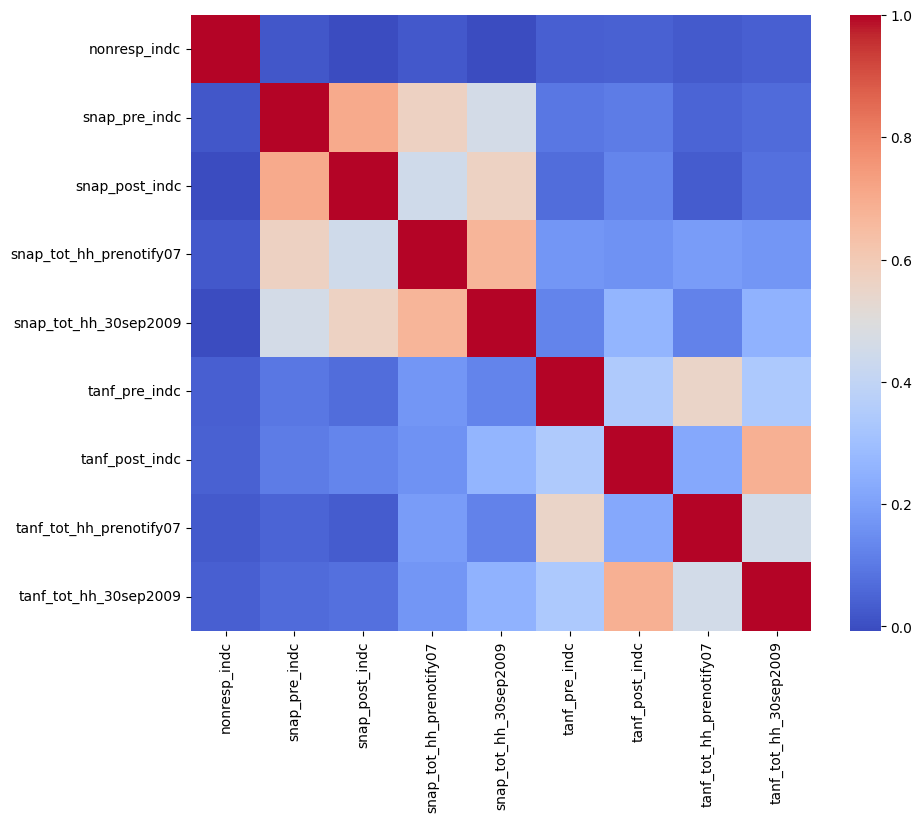

In [677]:
corr3_mat = sdata12m_corr3.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr3_mat, cmap='coolwarm')
plt.show()
# nothing too significant here but we will see

In [678]:
csv_file_path = 'OHIE/s12m_data.csv'
sdata12m.to_csv(csv_file_path, index=False)

How to identify confounding variables under a joint distribution setting? TA said that there is no good (standard) way to test for it without time. I propose this (which may or may not work): we run a random forest, which does automatic feature selection. Then we select the top few variables (i.e. those seem to predict missing values status well, thus high correlation), say $n = 5$.

*Update 02/29: can also try Lasso. Also this approach does bear the caveat of forming hypothesis based on the data that we want to apply it to, but prof said we can just mention it in the passing.*

In [456]:
# pip install scikit-learn

In [457]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [679]:
X_miss = pd.DataFrame(sdata12m[[
       'numhh_list_copy_signed self up',
       'numhh_list_copy_signed self up + 1 additional person',
       'numhh_list_copy_signed self up + 2 additional people',
       'wave_survey12m_copy_Survey Draw 1',
       'wave_survey12m_copy_Survey Draw 2',
       'wave_survey12m_copy_Survey Draw 3',
       'wave_survey12m_copy_Survey Draw 4',
       'wave_survey12m_copy_Survey Draw 5',
       'wave_survey12m_copy_Survey Draw 6',
       'wave_survey12m_copy_Survey Draws 7 & 8', 
       'protocol_12m_copy_Intensive', 'age', 'phone_indc',
       'english_indc', 'female_indc', 'first_day_indc', 'last_day_indc',
       'pobox_indc', 'self_indc', 'week_list_copy_Week 1',
       'week_list_copy_Week 2', 'week_list_copy_Week 3',
       'week_list_copy_Week 4', 'week_list_copy_Week 5',
       'week_list_copy_Week 6', 'zip_msa_indc', 
    'snap_pre_indc', 'snap_post_indc', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 
                           'tanf_pre_indc', 'tanf_post_indc','tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009'
]])
y_miss = sdata12m['nonresp_indc']

In [463]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import math

In [680]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_miss, y_miss, test_size=0.2, random_state=27)

In [681]:
Xscaler = StandardScaler().fit(X_full_train)
X_train_scaled = Xscaler.transform(X_full_train)

In [682]:
RF_full = RandomForestClassifier().fit(X_train_scaled, y_full_train)

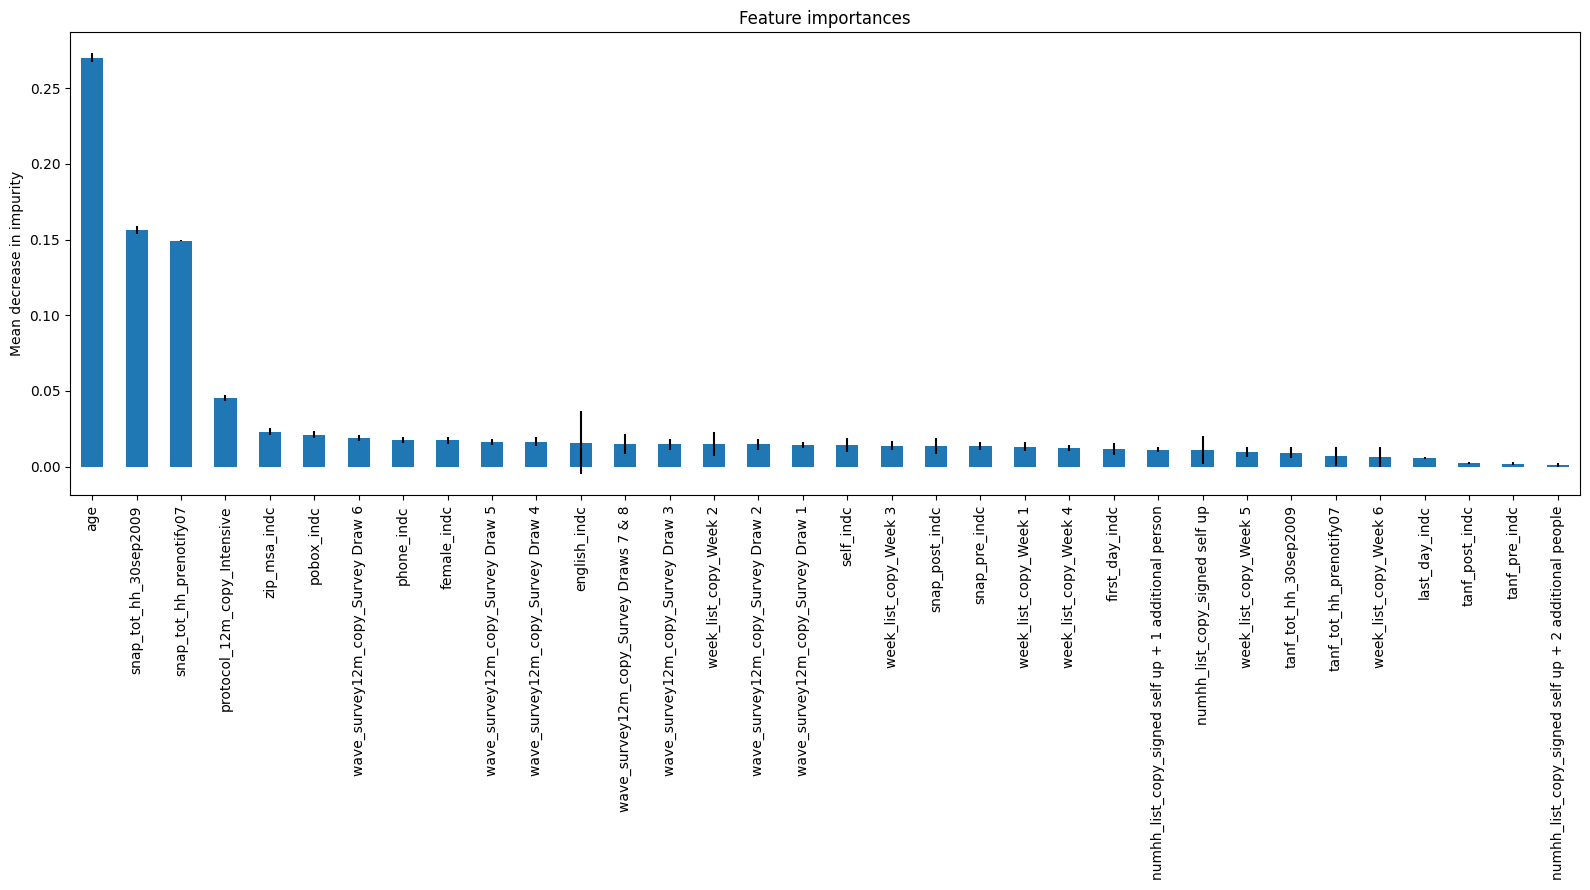

In [683]:
feature_names = X_miss.columns
importances = RF_full.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_full.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize =(16, 9))
forest_importances_sorted.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [684]:
forest_importances_sorted
# I don't know if including weight_12m in there defeats the purpose

age                                                     0.270203
snap_tot_hh_30sep2009                                   0.156411
snap_tot_hh_prenotify07                                 0.149278
protocol_12m_copy_Intensive                             0.045552
zip_msa_indc                                            0.023096
pobox_indc                                              0.021073
wave_survey12m_copy_Survey Draw 6                       0.018942
phone_indc                                              0.017480
female_indc                                             0.017427
wave_survey12m_copy_Survey Draw 5                       0.016449
wave_survey12m_copy_Survey Draw 4                       0.016355
english_indc                                            0.015846
wave_survey12m_copy_Survey Draws 7 & 8                  0.014996
wave_survey12m_copy_Survey Draw 3                       0.014872
week_list_copy_Week 2                                   0.014816
wave_survey12m_copy_Surve

In [481]:
#print("Variable Importance:")
#for i, importance in enumerate(forest_importances_sorted):
#    print(f"{feature_names[i]}: {importance}")

In [654]:
X_test_scaled = Xscaler.transform(X_full_test)
y_pred_full = RF_full.predict(X_test_scaled).reshape(-1, 1)
mse_full = mean_squared_error(y_full_test, y_pred_full)
mse_full
# 0.055817138943583595

In [694]:
# let's try the top 5 variables now
X_miss_sub = pd.DataFrame(sdata12m[[
    'intproto_indc', 'age', 'snap_tot_hh_30sep2009', 'snap_tot_hh_prenotify07', 'zip_msa_indc'
]])
# , 'zip_msa_indc', , 

In [647]:
X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_miss_sub, y_miss, test_size=0.2, random_state=27)

In [648]:
Xscaler = StandardScaler().fit(X_sub_train)
X_train_scaled = Xscaler.transform(X_sub_train)

In [649]:
RF_sub = RandomForestClassifier().fit(X_train_scaled, y_train)

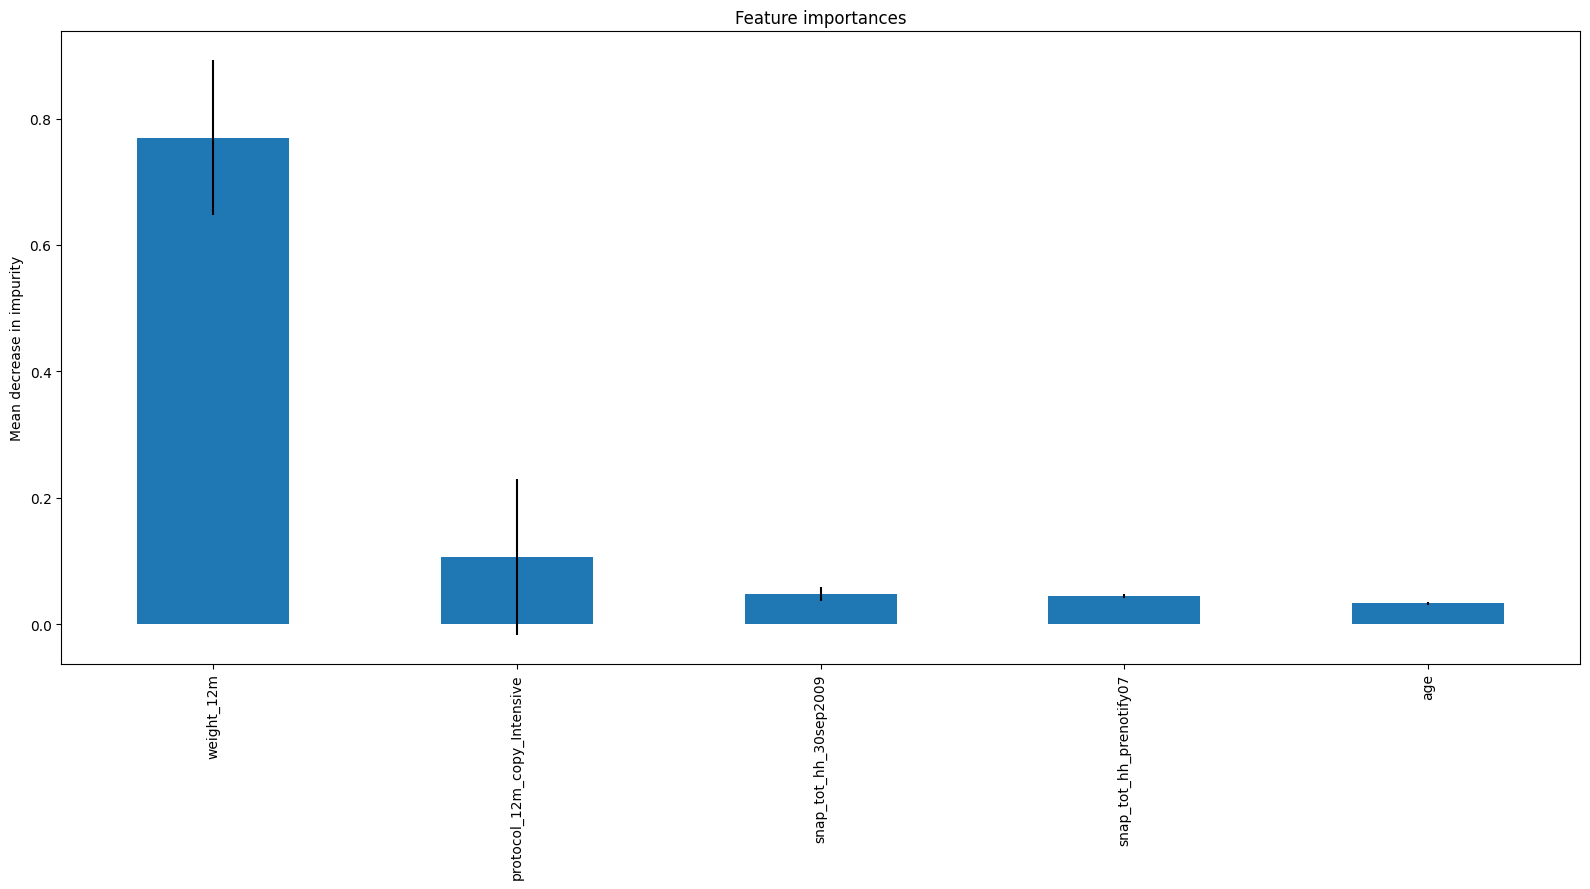

In [650]:
feature_names = X_miss_sub.columns
importances = RF_sub.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_sub.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize =(16, 9))
forest_importances_sorted.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [652]:
X_test_scaled = Xscaler.transform(X_sub_test)
y_pred_sub = RF_sub.predict(X_test_scaled).reshape(-1, 1)
mse_sub = mean_squared_error(y_test, y_pred_sub)
mse_sub
# 0.056502011814057014

0.056502011814057014

*Update 02/29: I am very stuck on the mathematical derivation part. I will spend more time on it during the weekend but at this point in time I cannot promise how the investigation will go.*

In [655]:
from sklearn.model_selection import KFold

In [690]:
sdata12m['rx_any_exist'] = (sdata12m['rx_any_miss'] != 1).astype(int)

In [699]:
W = controls
X = ['intproto_indc', 'age', 'snap_tot_hh_30sep2009', 'snap_tot_hh_prenotify07', 'zip_msa_indc']
Z = ['treatment_indc']
D = ['ohp_match_indc']
S = ['rx_any_exist']
Y = ['rx_any_indc']

In [702]:
rx_any_miss_vars = W + X + Z + D + S + Y
rx_any_miss_data = sdata12m[rx_any_miss_vars]
#rx_any_miss_data

In [ ]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

In [6]:
# unfinished
def dml_tau_est(data, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau_vec = []

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        X_data = train_data[

        # Predict D using random forest
        p_model = RandomForestRegressor()
        p_model.fit(eta_data[Z_set], eta_data['D'])
        p_pred = p_model.predict(theta_data[Z_set])

        # Predict X * Y using random forest
        f_model = RandomForestRegressor()
        f_model.fit(eta_data[Z_set], eta_data['X'] * eta_data['Y'])
        f_pred = f_model.predict(theta_data[Z_set])

        # Predict X^2 using random forest
        l_model = RandomForestRegressor()
        l_model.fit(eta_data[Z_set], eta_data['X']**2)
        l_pred = l_model.predict(theta_data[Z_set])

        theta_data['p'] = p_pred
        theta_data['f'] = f_pred
        theta_data['l'] = l_pred
        theta_data['g1'] = theta_data['D'] * (theta_data['X'] * theta_data['Y'] - theta_data['f']) / theta_data['p'] + theta_data['f']
        theta_data['g2'] = theta_data['D'] * (theta_data['X']**2 - theta_data['l']) / theta_data['p'] + theta_data['l']

        theta_vec.append(theta_data['g1'])


SyntaxError: unterminated string literal (detected at line 32) (4186774834.py, line 32)

In [5]:
# please ignore these

In [354]:
#print(sdata12m.columns.tolist())

In [4]:
# this is a point of concern, will leave it be for now
#sdata12m.columns[:20]
# 'OHIE_app_ins'
# 'ohp_all_ever_matchn_30sep2009'
sdata12m['OHIE_app_ins'].value_counts()
#0    49763
#1     8642
sdata12m['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    42829
#Enrolled        15576
# we have to deal with this somehow, figure out later

ohp_all_ever_matchn_30sep2009
NOT enrolled    42829
Enrolled        15576
Name: count, dtype: int64